In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("C:\\Users\\Sarvadnya\\Downloads\\fear_greed_index.csv")

In [3]:
df.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [4]:
df['classification'].unique()

array(['Fear', 'Extreme Fear', 'Neutral', 'Greed', 'Extreme Greed'],
      dtype=object)

In [5]:
df.isnull().sum()

timestamp         0
value             0
classification    0
date              0
dtype: int64

In [6]:
df['Date'] = pd.to_datetime(df['date'])

In [7]:
df['Date']

0      2018-02-01
1      2018-02-02
2      2018-02-03
3      2018-02-04
4      2018-02-05
          ...    
2639   2025-04-28
2640   2025-04-29
2641   2025-04-30
2642   2025-05-01
2643   2025-05-02
Name: Date, Length: 2644, dtype: datetime64[ns]

In [8]:
df = df.sort_values( by = 'Date')

In [9]:
df.head()

,timestamp,value,classification,date,Date
0,1517463000,30,Fear,2018-02-01,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02,2018-02-02
2,1517635800,40,Fear,2018-02-03,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05,2018-02-05


In [10]:
sentiment_df = df[
    ['Date' , 'classification'].copy()
]

In [11]:
sentiment_df.columns = ['date', 'sentiment']


In [12]:
df

,timestamp,value,classification,date,Date
0,1517463000,30,Fear,2018-02-01,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02,2018-02-02
2,1517635800,40,Fear,2018-02-03,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05,2018-02-05
...,...,...,...,...,...
2639,1745818200,54,Neutral,2025-04-28,2025-04-28
2640,1745904600,60,Greed,2025-04-29,2025-04-29
2641,1745991000,56,Greed,2025-04-30,2025-04-30
2642,1746077400,53,Neutral,2025-05-01,2025-05-01


In [13]:
sentiment_df.to_csv("cleaned_sentiment.csv", index=False)


In [14]:
df1 = df = pd.read_csv("C:\\Users\\Sarvadnya\\Downloads\\historical_data.csv")

In [15]:
df1.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [16]:
df1.columns

Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')

In [17]:
df1['Timestamp IST'] = pd.to_datetime(df1['Timestamp IST'], dayfirst=True)


In [18]:
sentiment_df = pd.read_csv("C:\\Users\\Sarvadnya\\OneDrive\\Desktop\\cleaned_sentiment.csv")

In [19]:
df1['date'] = pd.to_datetime(df1['Timestamp IST']).dt.date
sentiment_df['date'] = pd.to_datetime(sentiment_df['date']).dt.date


In [20]:
merger_df = df1.merge(sentiment_df , on = 'date' , how = 'left')

In [21]:
merger_df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,sentiment
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,Extreme Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,Extreme Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,Extreme Greed


In [22]:
merger_df.to_csv("merged_trades_with_sentiment.csv", index=False)


In [23]:
merger_df[['Account', 'Coin', 'date', 'sentiment', 'Closed PnL']].head()

,Account,Coin,date,sentiment,Closed PnL
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,2024-12-02,Extreme Greed,0.0
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,2024-12-02,Extreme Greed,0.0
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,2024-12-02,Extreme Greed,0.0
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,2024-12-02,Extreme Greed,0.0
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,2024-12-02,Extreme Greed,0.0


## Analysis

**Do traders perform better in Greed or Fear?**

In [24]:
merger_df.isnull().sum()

merger_df.groupby('sentiment')['Closed PnL'].describe()


,count,mean,std,min,25%,50%,75%,max
sentiment,,,,,,,,
Extreme Fear,21400.0,34.537862,1136.056091,-31036.69194,0.0,0.0,5.635032,115287.00000
Extreme Greed,39992.0,67.892861,766.828294,-10259.46800,0.0,0.0,10.028709,44223.45187
Fear,61837.0,54.290400,935.355438,-35681.74723,0.0,0.0,5.590856,135329.09010
Greed,50303.0,42.743559,1116.028390,-117990.10410,0.0,0.0,4.944105,74530.52371
Neutral,37686.0,34.307718,517.122220,-24500.00000,0.0,0.0,3.995795,48504.09555


**Which trade direction (Buy/Sell) works better in each sentiment?**

In [28]:
merger_df.groupby(['sentiment' , 'Side'])['Closed PnL'].mean().unstack()

Side,BUY,SELL
sentiment,,
Extreme Fear,34.114627,34.980106
Extreme Greed,10.498927,114.584643
Fear,63.927104,45.049641
Greed,25.002302,59.691091
Neutral,29.227429,39.456408


**Is risk-taking (e.g., size of trades) different during Fear vs Greed?**

In [33]:
merger_df.groupby('sentiment')['Size USD'].mean()

sentiment
Extreme Fear     5349.731843
Extreme Greed    3112.251565
Fear             7816.109931
Greed            5736.884375
Neutral          4782.732661
Name: Size USD, dtype: float64

**Is there more trading activity in Greed or Fear?**

In [35]:
merger_df['sentiment'].value_counts()


sentiment
Fear             61837
Greed            50303
Extreme Greed    39992
Neutral          37686
Extreme Fear     21400
Name: count, dtype: int64

**Are losses deeper during Fear days?**

In [41]:
merger_df[merger_df['Closed PnL'] < 0].groupby('sentiment')['Closed PnL'].mean()


sentiment
Extreme Fear    -257.099629
Extreme Greed   -119.920289
Fear            -156.662401
Greed           -181.967329
Neutral         -121.727849
Name: Closed PnL, dtype: float64

## Visualization

**1. Average PnL by Sentiment**

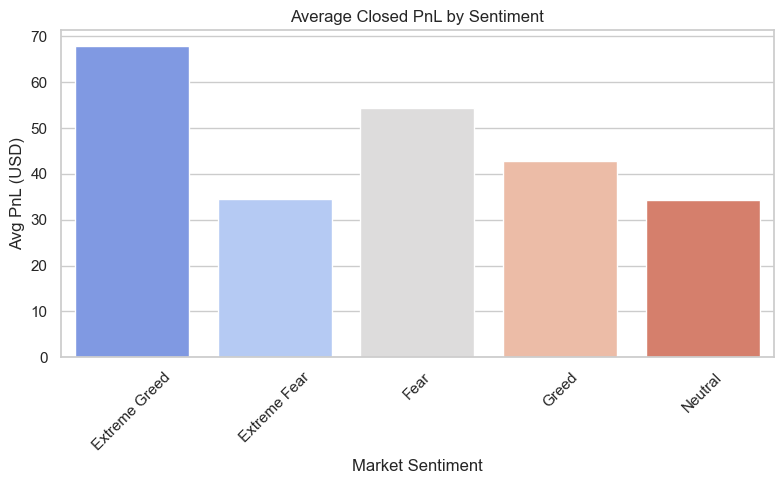

In [47]:
plt.figure(figsize=(8, 5))
sns.barplot(
    data=merger_df,
    x='sentiment',
    y='Closed PnL',
    errorbar=None,
    hue='sentiment',
    palette='coolwarm',
    legend=False
)


plt.title("Average Closed PnL by Sentiment")
plt.xlabel("Market Sentiment")
plt.ylabel("Avg PnL (USD)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**2. Average PnL by Sentiment and Side (Buy/Sell)**

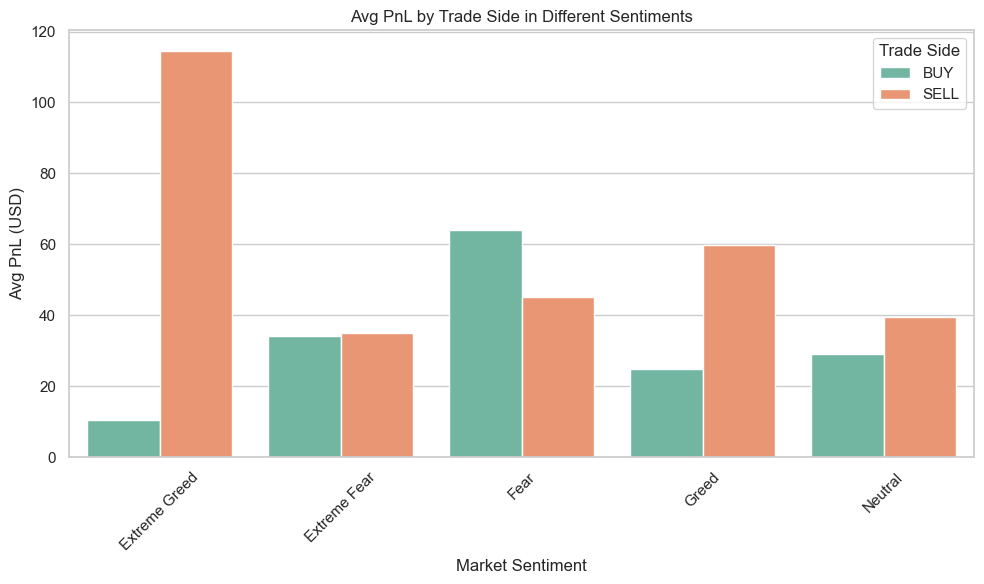

In [51]:
plt.figure(figsize=(10, 6))
sns.barplot(data=merger_df, x='sentiment', y='Closed PnL', hue='Side',errorbar=None, palette='Set2')

plt.title("Avg PnL by Trade Side in Different Sentiments")
plt.xlabel("Market Sentiment")
plt.ylabel("Avg PnL (USD)")
plt.xticks(rotation=45)
plt.legend(title='Trade Side')
plt.tight_layout()
plt.show()


**3. Average Trade Size (Risk) by Sentiment**

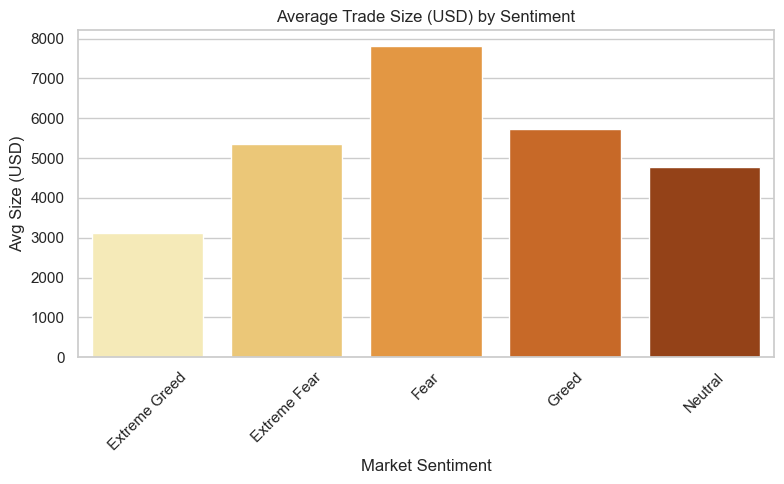

In [53]:
plt.figure(figsize=(8, 5))
sns.barplot(data=merger_df, x='sentiment', y='Size USD', hue = 'sentiment',errorbar=None, palette='YlOrBr' , legend = False)

plt.title("Average Trade Size (USD) by Sentiment")
plt.xlabel("Market Sentiment")
plt.ylabel("Avg Size (USD)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**4. Distribution of Trades by Sentiment (Count Plot)**

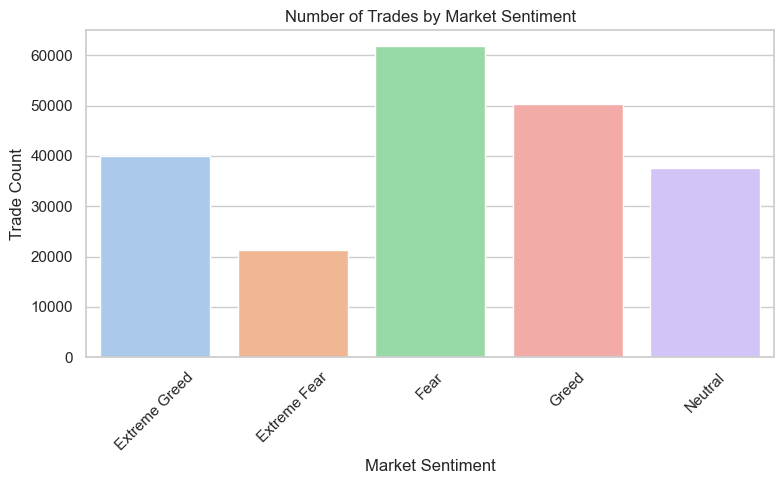

In [63]:
plt.figure(figsize=(8, 5))
sns.countplot(data=merger_df, x='sentiment', hue = 'sentiment',  palette='pastel', legend =False)

plt.title("Number of Trades by Market Sentiment")
plt.xlabel("Market Sentiment")
plt.ylabel("Trade Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**5. PnL Distribution per Sentiment (Box Plot)**

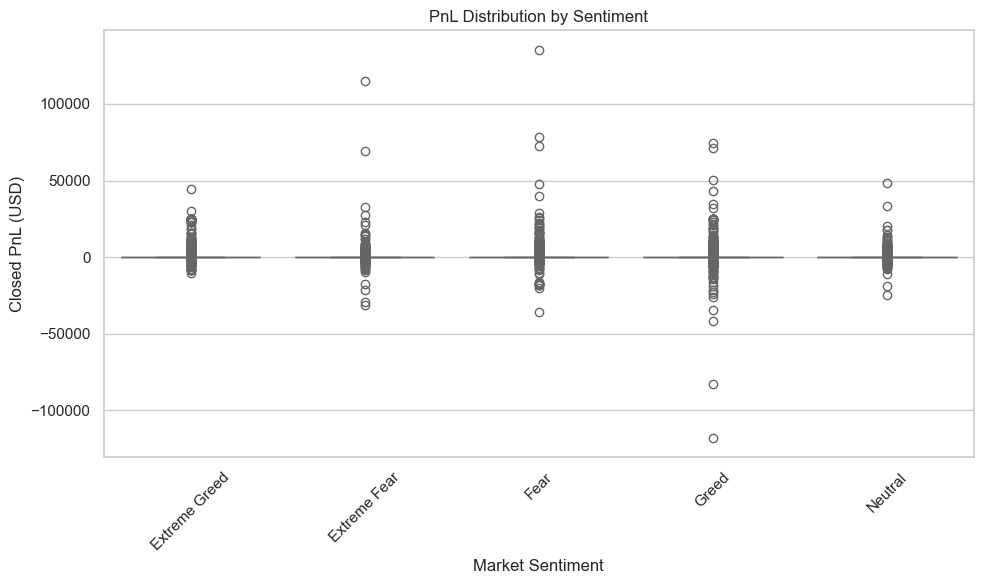

In [62]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=merger_df, x='sentiment', y='Closed PnL', hue = 'sentiment',  palette='Set3' , legend = False)

plt.title("PnL Distribution by Sentiment")
plt.xlabel("Market Sentiment")
plt.ylabel("Closed PnL (USD)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
